In [1]:
import os
import sys
import numpy as np
import pandas as pd
import gensim
import keras as ks
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model 
from keras.layers import Dense, Flatten
from keras.engine.topology import Input
from keras.layers import Embedding
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.initializers import Initializer
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [2]:
print(ks.__version__)
print(tf.__version__)

2.0.3
1.1.0


In [3]:
# DL8
HOME_DIR = "/home/avkash/toolkit/github/answerbot/"
# Maxwell
#HOME_DIR = "/home/avkash/tools/projects/sentiments/"
review_file = "sentiments_dataset_2col.csv"

In [19]:
text_df = pd.read_csv(HOME_DIR + review_file)

In [5]:
text_df.shape

(1600000, 2)

In [6]:
text_df.columns

Index([u'label', u'text'], dtype='object')

In [7]:
text_df['label'].unique()

array([0, 1])

In [8]:
text_df['label'].value_counts()

1    800000
0    800000
Name: label, dtype: int64

In [9]:
text_df.shape

(1600000, 2)

In [20]:
text_df = text_df.sample(frac=0.05)

In [21]:
text_df.shape

(80000, 2)

In [22]:
text_df['label'].value_counts()

1    40046
0    39954
Name: label, dtype: int64

In [13]:
# Save to disk
# Use when in need
# text_df.to_csv("/home/avkash/toolkit/github/answerbot/sentiments_dataset_2col.csv", index=False)

In [14]:
BASE_DIR = '/home/avkash/toolkit/github/answerbot'
#BASE_DIR = '/home/avkash/tools/github'
GLOVE_DIR = BASE_DIR + '/glove.6B/'

In [15]:
print('Indexing word vectors.')

embeddings_index = {}
f = open(os.path.join(GLOVE_DIR, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))


Indexing word vectors.
Found 400000 word vectors.


In [23]:
# Creating text enteries and their labels
print(len(text_df['label']))
print(len(text_df['text']))

80000
80000


In [24]:
reviews_raw = text_df['text'].tolist()
labels = text_df['label'].tolist()

In [25]:
labels_items = text_df['label'].unique()
print(len(labels_items))
print(labels_items)

2
[1 0]


In [26]:
# Converting label_index
labels_index = {}
for x in labels_items:
    labels_index[x] = x
print labels_index
print len(labels_index)

{0: 0, 1: 1}
2


In [27]:
print(len(reviews_raw))
print(len(labels))

80000
80000


In [28]:
# Just verifying that labels are proper and have 1 to 5 series
labels

[1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,


In [29]:
# Import the stop word list
from nltk.corpus import stopwords 
# Test if we do have stopwords
print stopwords.words("english") 

[u'i', u'me', u'my', u'myself', u'we', u'our', u'ours', u'ourselves', u'you', u'your', u'yours', u'yourself', u'yourselves', u'he', u'him', u'his', u'himself', u'she', u'her', u'hers', u'herself', u'it', u'its', u'itself', u'they', u'them', u'their', u'theirs', u'themselves', u'what', u'which', u'who', u'whom', u'this', u'that', u'these', u'those', u'am', u'is', u'are', u'was', u'were', u'be', u'been', u'being', u'have', u'has', u'had', u'having', u'do', u'does', u'did', u'doing', u'a', u'an', u'the', u'and', u'but', u'if', u'or', u'because', u'as', u'until', u'while', u'of', u'at', u'by', u'for', u'with', u'about', u'against', u'between', u'into', u'through', u'during', u'before', u'after', u'above', u'below', u'to', u'from', u'up', u'down', u'in', u'out', u'on', u'off', u'over', u'under', u'again', u'further', u'then', u'once', u'here', u'there', u'when', u'where', u'why', u'how', u'all', u'any', u'both', u'each', u'few', u'more', u'most', u'other', u'some', u'such', u'no', u'nor', u

In [30]:
# Cleaning function
from bs4 import BeautifulSoup 
import re
def review_to_words( raw_review ):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    #
    # 1. Remove HTML
    review_text = raw_review #BeautifulSoup(raw_review).get_text() 
    # 1. Making sure string is string
    review_text = str(review_text)

    # 2. Remove non-letters
    if len(review_text) > 0:
        letters_only = re.sub("[^a-zA-Z0-9]", " ", review_text) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.split()                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words )) 

In [31]:
print(reviews_raw[0])
print(labels[0])

Ask, believe,receive. I love the Book &quot;The Secret&quot;  a book of guidence.
1


In [32]:
# Initialize an empty list to hold the clean reviews
reviews_len = len(reviews_raw)
reviews = []
print "Total Reviews: ", reviews_len
# Loop over each review; create an index i that goes from 0 to the length
# of the movie review list 
for i in xrange( 0, reviews_len ):
    # Call our function for each one, and add the result to the list of
    # clean reviews
    reviews.append( review_to_words( reviews_raw[i] ) )
    if ( i%10000 == 0):
        print "Processed... ", i

Total Reviews:  80000
Processed...  0
Processed...  10000
Processed...  20000
Processed...  30000
Processed...  40000
Processed...  50000
Processed...  60000
Processed...  70000


In [33]:
print(len(reviews))
print(len(labels))

80000
80000


In [34]:
# Displaying random review text 
from random import randint
i_x = randint(0,len(reviews))
print("Index %s" % i_x)
print(reviews_raw[i_x])
print(labels[i_x])

Index 41174
@JustJazzo idk. i hope soon. i miss you guys 
0


In [36]:
MAX_SEQUENCE_LENGTH = 200 # DO not exceed it over 1000
MAX_NB_WORDS = 100000
EMBEDDING_DIM = 100 # This is the 3rd dimension
VALIDATION_SPLIT = 0.2

In [37]:
# finally, vectorize the text samples into a 2D integer tensor
tokenizer = Tokenizer(nb_words=MAX_NB_WORDS) # num_words replaced with nb_words
tokenizer.fit_on_texts(reviews)
sequences = tokenizer.texts_to_sequences(reviews)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

/home/avkash/.local/lib/python2.7/site-packages/keras/preprocessing/text.py:89: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


Found 80474 unique tokens.


In [39]:
# Sequence is list here
print(len(sequences))
print(sequences[0])
print(sequences[2])
print(sequences[len(sequences)-1])

80000
[592, 287, 3422, 1, 12, 423, 6, 43, 1585, 6, 423, 42027]
[43889, 26903, 920, 14766, 1796, 4633, 3466, 990, 176, 322, 13, 840, 389]
[1, 121, 7, 16, 55]


In [40]:
# Converting sequence to vector of same width/depth
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', data.shape)

('Shape of data tensor:', (80000, 200))


In [41]:
# We can see the any item from the data as below:
print(data[1,])

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0   

In [42]:
new_labels = to_categorical(np.asarray(labels))
new_labels

array([[ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       ..., 
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.]])

In [43]:
print('Shape of label tensor:', new_labels.shape) ## All the stars are label now

('Shape of label tensor:', (80000, 2))


In [44]:
# Verifying Labels for distribtion
print(new_labels[0,])
print(new_labels[1,])

[ 0.  1.]
[ 0.  1.]


In [45]:
# split the data into a training set and a validation set
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labelsX = new_labels[indices]
num_validation_samples = int(VALIDATION_SPLIT * data.shape[0])

x_train = data[:-num_validation_samples]
y_train = labelsX[:-num_validation_samples]
x_val = data[-num_validation_samples:]
y_val = labelsX[-num_validation_samples:]

In [46]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(64000, 200)
(64000, 2)
(16000, 200)
(16000, 2)


In [47]:
print('Preparing embedding matrix.')
# prepare embedding matrix
num_words = min(MAX_NB_WORDS, len(word_index))
print(num_words)
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if i >= MAX_NB_WORDS:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

Preparing embedding matrix.
80474


In [48]:
# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False
                           )

In [49]:
print('Training model.')
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,),  dtype='int32')

Training model.


In [50]:
embedded_sequences = embedding_layer(sequence_input)

In [51]:
#keras.layers.embeddings.Embedding(input_dim, output_dim, embeddings_initializer='uniform', 
#                                  embeddings_regularizer=None, 
#                                  activity_regularizer=None, embeddings_constraint=None, mask_zero=False, 
#                                  input_length=None)
x = Conv1D(128, 5, activation='relu')(embedded_sequences)
x = MaxPooling1D(5)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = MaxPooling1D(5)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = MaxPooling1D(2)(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
preds = Dense(len(labels_index), activation='softmax')(x)   # Replace 6 -> len(labels_index)

In [52]:
model = Model(sequence_input, preds)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

In [53]:
# Check nvidia gpu
# $ watch -n1 nvidia-smi
!nvidia-smi

Sat May  6 20:45:20 2017       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 370.28                 Driver Version: 370.28                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  TITAN X (Pascal)    Off  | 0000:81:00.0     Off |                  N/A |
| 23%   39C    P2    54W / 250W |  11619MiB / 12188MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [54]:
fit_results = model.fit(x_train, y_train,
          batch_size=128,
          epochs=20,
          validation_data=(x_val, y_val))

Train on 64000 samples, validate on 16000 samples
Epoch 1/20
64000/64000 [==============================] - 5s - loss: 0.6933 - acc: 0.4974 - val_loss: 0.6931 - val_acc: 0.5030

In [55]:
model.get_config()

{'input_layers': [['input_1', 0, 0]],
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 200),
    'dtype': 'int32',
    'name': 'input_1',
    'sparse': False},
   'inbound_nodes': [],
   'name': 'input_1'},
  {'class_name': 'Embedding',
   'config': {'activity_regularizer': None,
    'batch_input_shape': (None, 200),
    'dtype': 'int32',
    'embeddings_constraint': None,
    'embeddings_initializer': {'class_name': 'RandomUniform',
     'config': {'maxval': 0.05, 'minval': -0.05, 'seed': None}},
    'embeddings_regularizer': None,
    'input_dim': 80474,
    'input_length': 200,
    'mask_zero': False,
    'name': 'embedding_1',
    'output_dim': 100,
    'trainable': False},
   'inbound_nodes': [[['input_1', 0, 0, {}]]],
   'name': 'embedding_1'},
  {'class_name': 'Conv1D',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regula

In [56]:
model.save_weights(HOME_DIR +  "sentiments-model/" + 'sentiments_weights_e20.h5')
model.save( HOME_DIR + "sentiments-model/" + 'sentiments_save_e20.HDF5')

In [57]:
# serialize model to JSON
model_json_file = HOME_DIR + "sentiments-model/" + 'sentiments_model_e20.json'
model_json = model.to_json()
with open(model_json_file, "w") as json_file:
    json_file.write(model_json)

In [58]:
from keras import metrics
mm = model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=[metrics.mae, metrics.categorical_accuracy, metrics.mse])

In [59]:
fit_results.history.keys()

['acc', 'loss', 'val_acc', 'val_loss']

In [60]:
print(fit_results.history['loss'])

[0.6932999854087829, 0.69311708712577824, 0.6933315113782883, 0.69323446607589723, 0.69307889449596405, 0.69321188855171201, 0.69320015931129453, 0.69317830014228821, 0.69307308590412142, 0.69307522153854373, 0.69307339644432064, 0.69304009437561032, 0.69302148854732515, 0.6930586220026016, 0.69298053300380702, 0.69306548309326177, 0.6930224413871765, 0.69302359175682071, 0.69300975120067598, 0.69304429757595065]


In [61]:
fit_results.history['acc']

[0.49735937499999999,
 0.49835937499999999,
 0.49946875000000002,
 0.499453125,
 0.50073437499999995,
 0.498953125,
 0.49492187500000001,
 0.49835937499999999,
 0.49881249999999999,
 0.50012500000000004,
 0.49973437500000001,
 0.50026562500000005,
 0.497546875,
 0.50082812499999996,
 0.50029687499999997,
 0.49603124999999998,
 0.50060937500000002,
 0.50032812500000001,
 0.496546875,
 0.50135937500000005]

In [62]:
fit_results.history['val_acc']

[0.503,
 0.49725000000000003,
 0.49725000000000003,
 0.503,
 0.49725000000000003,
 0.50293750000000004,
 0.50293750000000004,
 0.503,
 0.49725000000000003,
 0.49725000000000003,
 0.49725000000000003,
 0.50293750000000004,
 0.50293750000000004,
 0.49725000000000003,
 0.49725000000000003,
 0.50293750000000004,
 0.49725000000000003,
 0.50293750000000004,
 0.49725000000000003,
 0.50293750000000004]

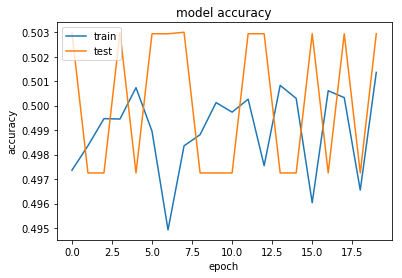

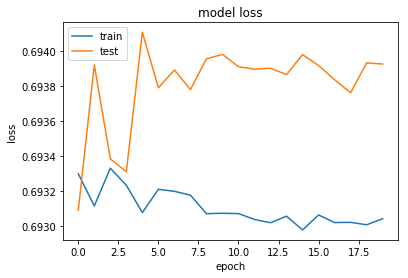

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline
history = fit_results
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [64]:
scores = model.evaluate(x_train, y_train, verbose = 0)
print("Training Accuracy: %.2f%%" % (scores[1]*100))

Training Accuracy: 49.98%


In [65]:
scores = model.evaluate(x_val, y_val, verbose = 0)
print("Validation Accuracy: %.2f%%" % (scores[1]*100))

Validation Accuracy: 49.98%


In [66]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(64000, 200)
(64000, 2)
(16000, 200)
(16000, 2)


In [67]:
trainPredict = model.predict(x_train)
testPredict = model.predict(x_val)

In [68]:
print(testPredict[10,].shape)
print(testPredict[10,])
print(trainPredict[1,].shape)
print(trainPredict[1,])

(2,)
[ 0.49332181  0.50667816]
(2,)
[ 0.49332181  0.50667816]


In [69]:
def predictOne():
    i_x = randint(0,len(x_val))
    print i_x
    tgt = x_train[i_x,0:10000]
    tgt = tgt.reshape(1,200)
    tpr = model.predict(tgt)
    print(np.round(tpr,2))

In [71]:
predictOne()

1930
[[ 0.49000001  0.50999999]]


In [84]:
myreview= ["Is there a way to save the whole environment in H2o Flow, so you can get all the grids, " + 
           " models, and predictions intact after you restart the h2o? When I do Download a flow, " + 
           " or Save/Load it loads only a flow with no data"]

In [78]:
myreview = ["I am not happy and i will not try to run GBM again on H2O"]

In [85]:
myreview 

['Is there a way to save the whole environment in H2o Flow, so you can get all the grids,  models, and predictions intact after you restart the h2o? When I do Download a flow,  or Save/Load it loads only a flow with no data']

In [86]:
my_sequence = tokenizer.texts_to_sequences(myreview)
print(my_sequence)

[[135, 477, 160, 65, 276, 808, 43, 376, 6651, 289, 11302, 3063, 70, 48, 169, 4, 353, 43, 5981, 72, 11737, 1100, 48, 9123, 43, 11302, 699, 1, 437, 879, 160, 3063, 724, 808, 1368, 26, 1204, 678, 160, 3063, 726, 96, 2364]]


In [87]:
my_data = pad_sequences(my_sequence, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', my_data.shape)
# print(my_data) > This will show you 1000 width sequence

('Shape of data tensor:', (1, 200))


In [88]:
my_result = model.predict(my_data)
print(np.round(my_result,2))
# 0 - Negative
# 1 - Positive

[[ 1.  0.]]


In [89]:
a = np.round(my_result,2)
maxid = a.argmax()

In [90]:
if maxid == 1:
    print "good"
else: 
    print "bad"

bad
